In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
import seaborn as sns
from sklearn.model_selection import train_test_split

In [ ]:
# Set display options
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
sns.set_style("darkgrid")
rs = 2838
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
url = "https://raw.githubusercontent.com/drizzletechnova/datasets/main/Invistico_Airline.csv"
data = pd.read_csv(url)
data.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5,0,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [ ]:
import pandas as pd

features_description = {
    'Feature': [
        'satisfaction',
        'Gender',
        'Customer Type',
        'Age',
        'Type of Travel',
        'Class',
        'Flight Distance',
        'Seat comfort',
        'Departure/Arrival time convenient',
        'Food and drink',
        'Gate location',
        'Inflight wifi service',
        'Inflight entertainment',
        'Online support',
        'Ease of Online booking',
        'On-board service',
        'Leg room service',
        'Baggage handling',
        'Checkin service',
        'Cleanliness',
        'Online boarding',
        'Departure Delay in Minutes',
        'Arrival Delay in Minutes'
    ],
    'Description': [
        'Overall satisfaction level with the airline (target variable)',
        'Gender of the passenger',
        'Type of customer (Loyal, disloyal)',
        'Age of the passenger',
        'Purpose of the flight (Personal, Business)',
        'Travel class in the plane',
        'Distance of the flight',
        'Rating of seat comfort (0-5 scale)',
        'Rating of departure/arrival time convenience (0-5 scale)',
        'Rating of food and beverage (0-5 scale)',
        'Rating of gate location convenience (0-5 scale)',
        'Rating of in-flight wifi service (0-5 scale)',
        'Rating of in-flight entertainment options (0-5 scale)',
        'Rating of online customer support (0-5 scale)',
        'Rating of how easy it was to book online (0-5 scale)',
        'Rating of on-board service (0-5 scale)',
        'Rating of leg room (0-5 scale)',
        'Rating of baggage handling service (0-5 scale)',
        'Rating of check-in service (0-5 scale)',
        'Rating of airplane cleanliness (0-5 scale)',
        'Rating of online boarding experience (0-5 scale)',
        'Flight departure delay in minutes',
        'Flight arrival delay in minutes'
    ]
}

features_df = pd.DataFrame(features_description)
features_df

,Feature,Description
0,satisfaction,Overall satisfaction level with the airline (target variable)
1,Gender,Gender of the passenger
2,Customer Type,"Type of customer (Loyal, disloyal)"
3,Age,Age of the passenger
4,Type of Travel,"Purpose of the flight (Personal, Business)"
5,Class,Travel class in the plane
6,Flight Distance,Distance of the flight
7,Seat comfort,Rating of seat comfort (0-5 scale)
8,Departure/Arrival time convenient,Rating of departure/arrival time convenience (0-5 scale)
9,Food and drink,Rating of food and beverage (0-5 scale)


In [ ]:
data.isnull().sum()

,0
satisfaction,0
Gender,0
Customer Type,0
Age,0
Type of Travel,0
Class,0
Flight Distance,0
Seat comfort,0
Departure/Arrival time convenient,0
Food and drink,0


In [ ]:
data["Class"].value_counts()

,count
Class,
Business,62160
Eco,58309
Eco Plus,9411


In [ ]:
categorical= data.select_dtypes(include = "object")
#categorical_columns = categorical.columns

In [ ]:
categorical_columns = [i for i in categorical.columns if i != "satisfaction"]

In [ ]:
categorical.describe()
#categorical_columns

,satisfaction,Gender,Customer Type,Type of Travel,Class
count,129880,129880,129880,129880,129880
unique,2,2,2,2,3
top,satisfied,Female,Loyal Customer,Business travel,Business
freq,71087,65899,106100,89693,62160


In [ ]:
numerical = data.select_dtypes(exclude = "object")
numerical_columns = numerical.columns

In [ ]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Age                                129880 non-null  int64  
 1   Flight Distance                    129880 non-null  int64  
 2   Seat comfort                       129880 non-null  int64  
 3   Departure/Arrival time convenient  129880 non-null  int64  
 4   Food and drink                     129880 non-null  int64  
 5   Gate location                      129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Inflight entertainment             129880 non-null  int64  
 8   Online support                     129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  On-board service                   129880 non-null  int64  
 11  Leg room service                   1298

In [ ]:
numerical.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,39.427957,1981.409055,2.838597,2.990645,2.851994,2.990422,3.249130,3.383477,3.519703,3.472105,3.465075,3.485902,3.695673,3.340807,3.705759,3.352587,14.713713,15.091129
std,15.119360,1027.115606,1.392983,1.527224,1.443729,1.305970,1.318818,1.346059,1.306511,1.305560,1.270836,1.292226,1.156483,1.260582,1.151774,1.298715,38.071126,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1925.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2544.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [ ]:
numerical_discrete = [ i for i in numerical.columns if i not in [ "Age","Flight Distance", 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']]
numerical_discrete

['Seat comfort',
 'Departure/Arrival time convenient',
 'Food and drink',
 'Gate location',
 'Inflight wifi service',
 'Inflight entertainment',
 'Online support',
 'Ease of Online booking',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Cleanliness',
 'Online boarding']

In [ ]:
numerical_continuous = [ i for i in numerical.columns if i in ["Age","Flight Distance"]]
numerical_continuous

['Age', 'Flight Distance']

In [ ]:
numerical_continuous_log = [ i for i in numerical.columns if i in [ "Departure Delay in Minutes","Arrival Delay in Minutes"]]
numerical_continuous_log

['Departure Delay in Minutes', 'Arrival Delay in Minutes']

In [ ]:
data["satisfaction"].value_counts()

,count
satisfaction,
satisfied,71087
dissatisfied,58793


# DATA VISUALISATION

<Axes: xlabel='satisfaction', ylabel='count'>

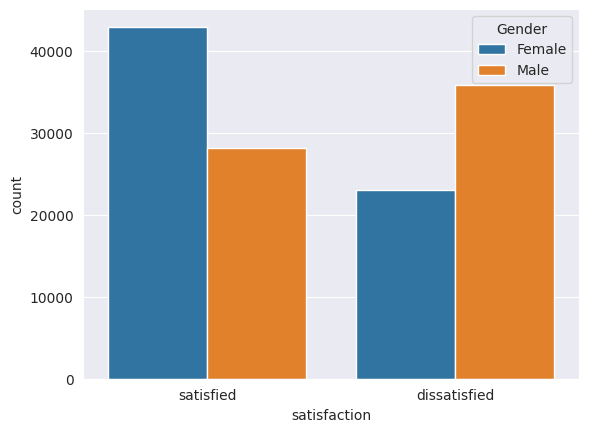

In [ ]:
sns.countplot(x = "satisfaction", hue = "Gender",data= data)

In [ ]:
def plot_numerical_continuous(variable, target, df):
    # Sample a fraction of the data based on both variable and target columns
    plt.figure(figsize=(22, 4))
    #print(variable)
    #Histogram
    plt.subplot(1, 4, 1)
    sns.histplot(x= variable,data = df,hue = target ,bins=30, kde = True)
    plt.title('histogram')
    #Scatter plot
    plt.subplot(1, 4, 2)
    sns.boxplot(y = variable, x = target, data=df)
    plt.title('boxplot')
    # regplot
    plt.subplot(1,4,3)
    sns.stripplot(y=variable, x=target, data=df)
    plt.title('stripplot')
    plt.tight_layout()
    plt.show()

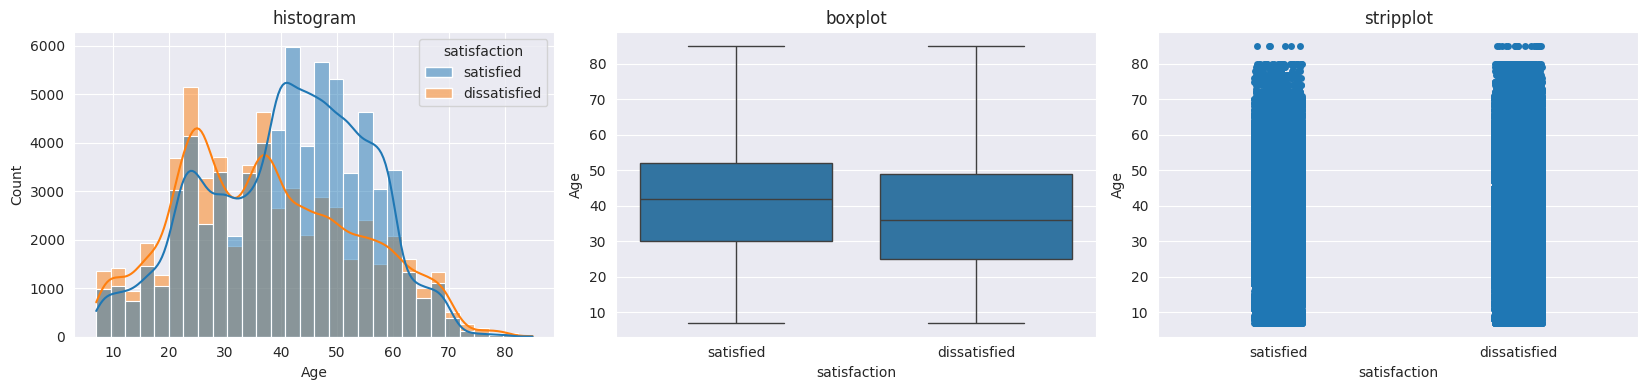

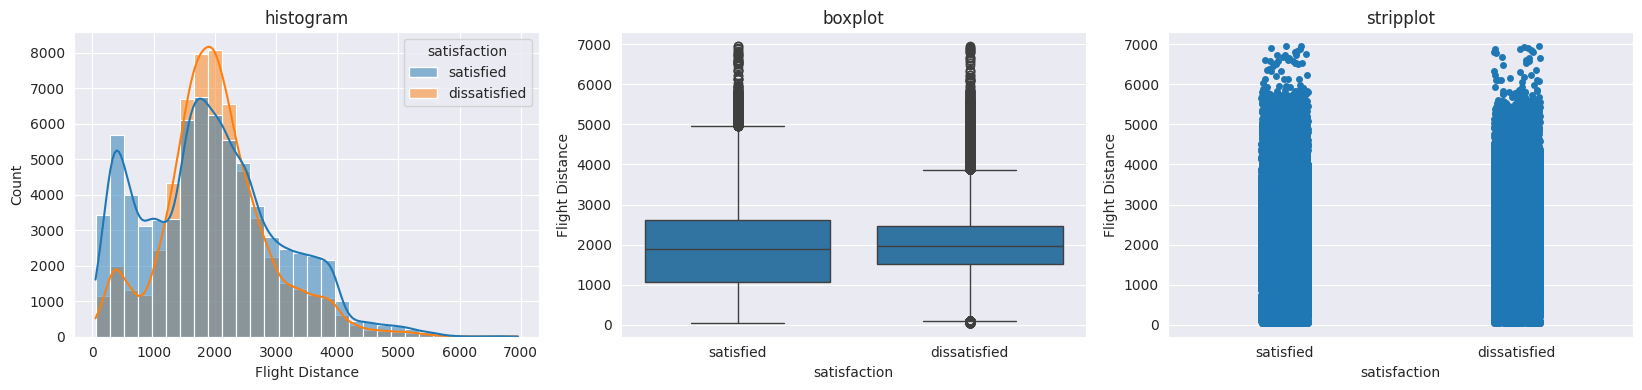

In [ ]:
for column in numerical_continuous:
     #print(column)
     plot_numerical_continuous(column, 'satisfaction', data)

In [ ]:
def plot_numerical_continuous_log(variable, target, df):
    plt.figure(figsize=(22, 4))
    #print(df)
    variable = np.log1p(df[variable])
    #Histogram
    plt.subplot(1, 4, 1)
    sns.histplot(x= variable,hue = target ,bins=30, kde = True,  data=df)
    plt.title('histogram')
    #Scatter plot
    plt.subplot(1, 4, 2)
    sns.boxplot(y = variable, x = target, data=df)
    plt.title('boxplot')
    # regplot
    plt.subplot(1,4,3)
    sns.stripplot(y=variable, x=target, data=df)
    plt.title('stripplot')
    plt.tight_layout()
    plt.show()

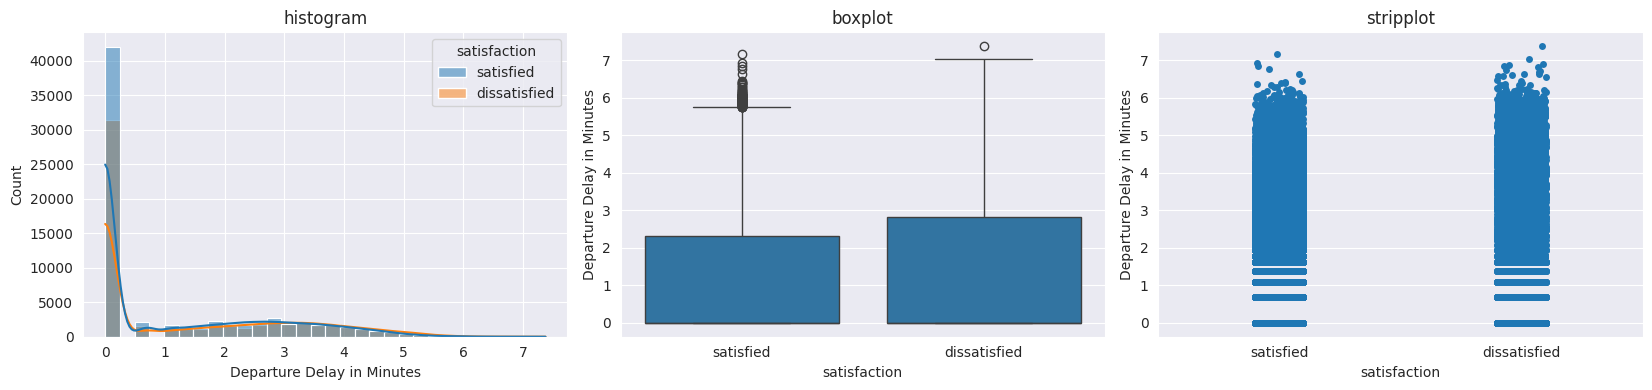

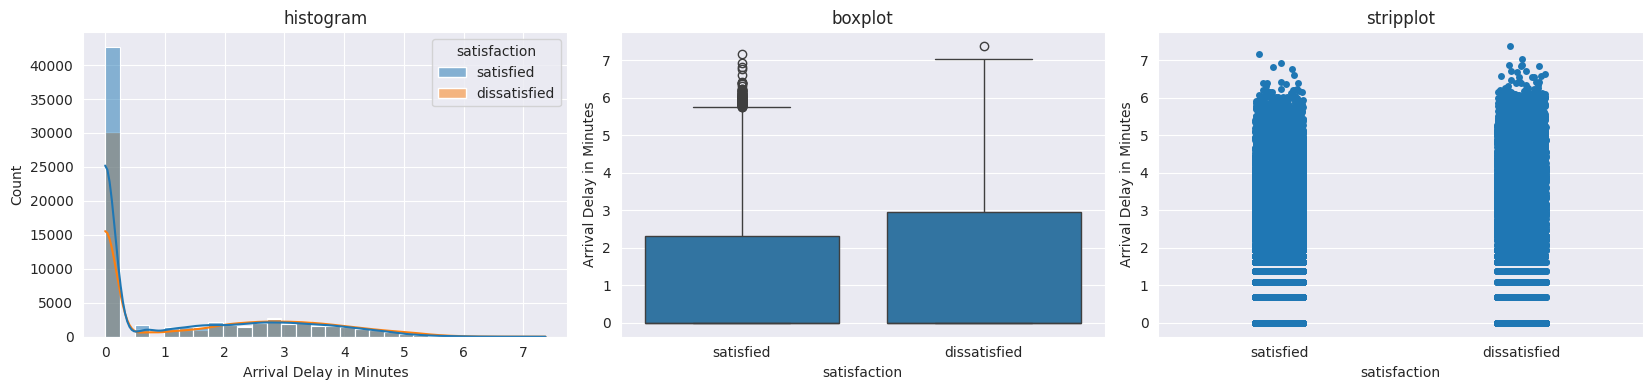

In [ ]:
for column in numerical_continuous_log:
     plot_numerical_continuous_log(column, 'satisfaction', data)

In [ ]:
def plot_numerical_discrete(variable, target, df):
    plt.figure(figsize=(24,4))
    #variable= np.log(data[variable])
    #Histogram
    plt.subplot(1, 4, 1)
    sns.countplot(x= variable,hue = target,data=df)
    plt.title('histogram')
    #Scatter plot
    plt.subplot(1, 4, 2)
    sns.boxplot(y = variable, x = target, data=df)
    plt.title('boxplot')
    # violinplot
    plt.subplot(1,4,3)
    sns.violinplot(y=variable, x=target, data=df)
    plt.title('stripplot')
    plt.tight_layout()
    plt.show()

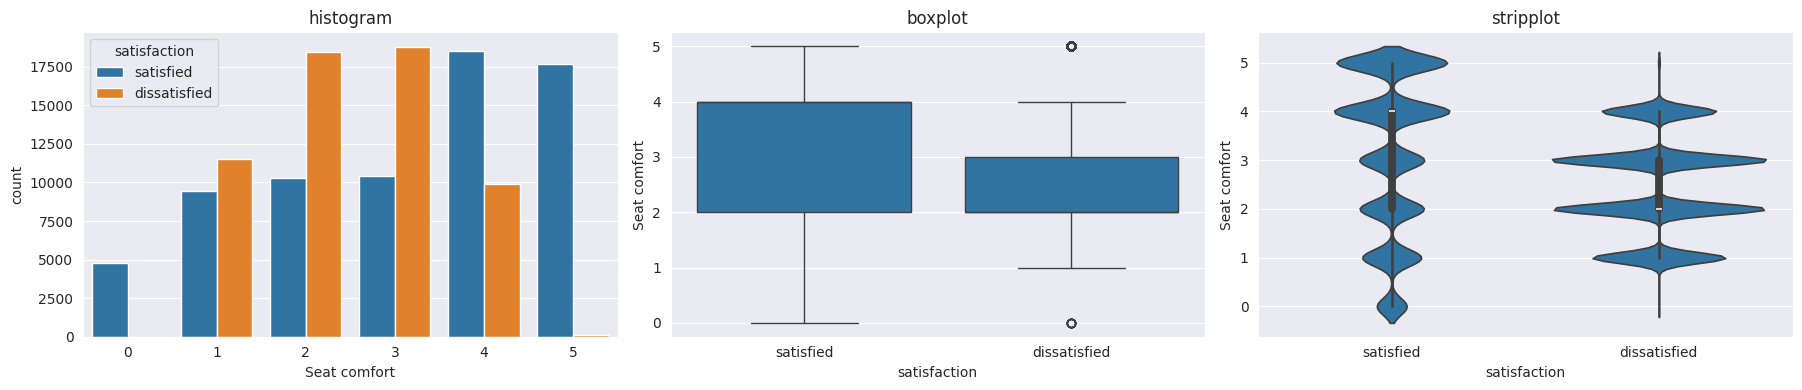

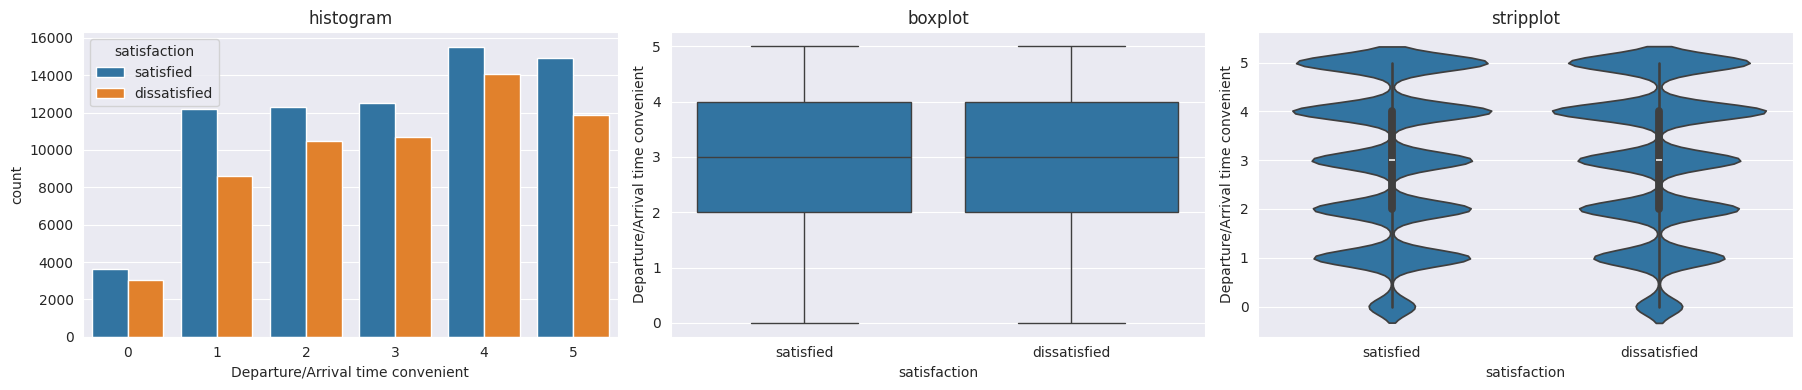

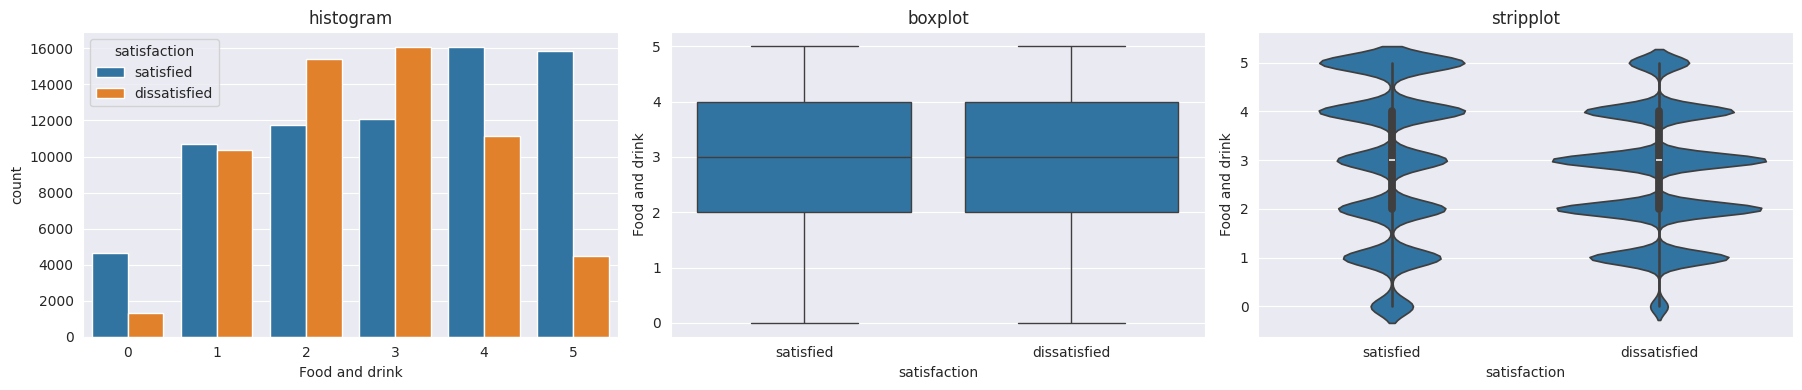

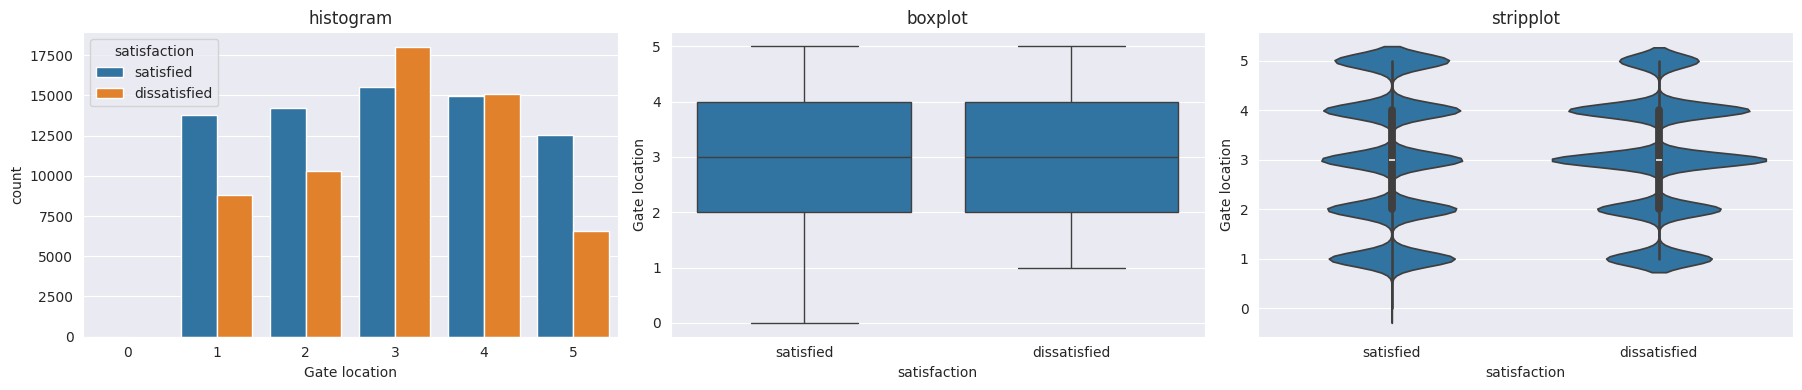

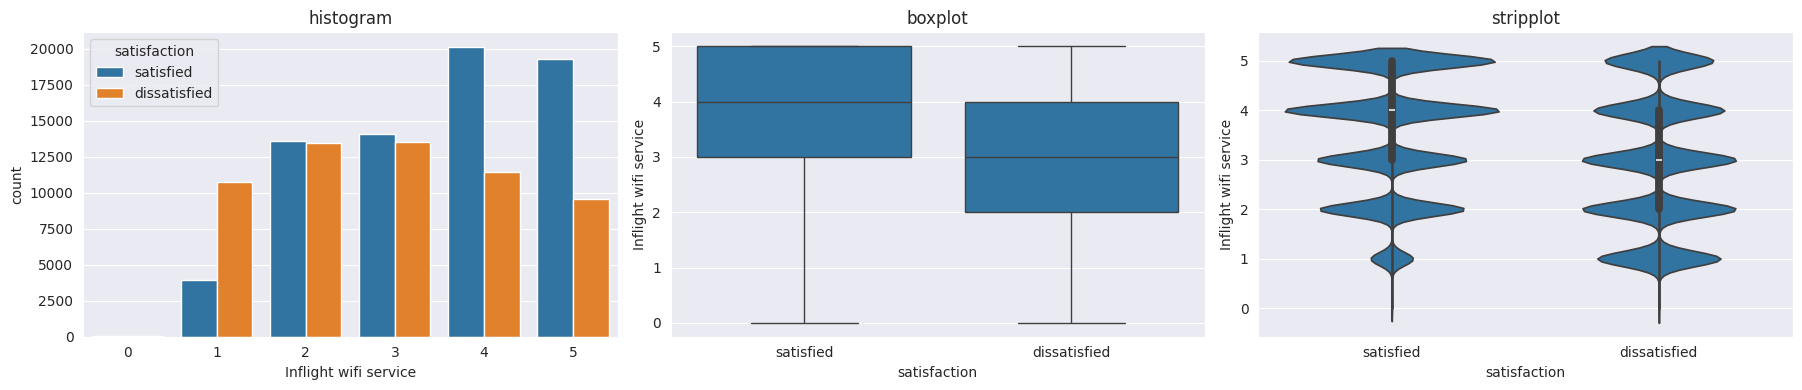

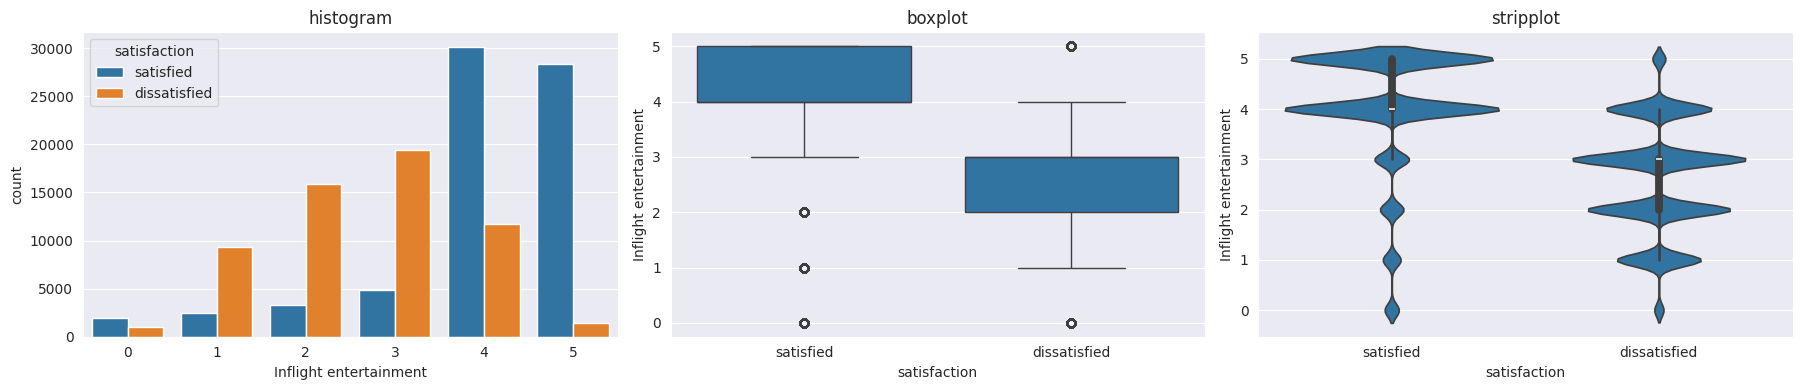

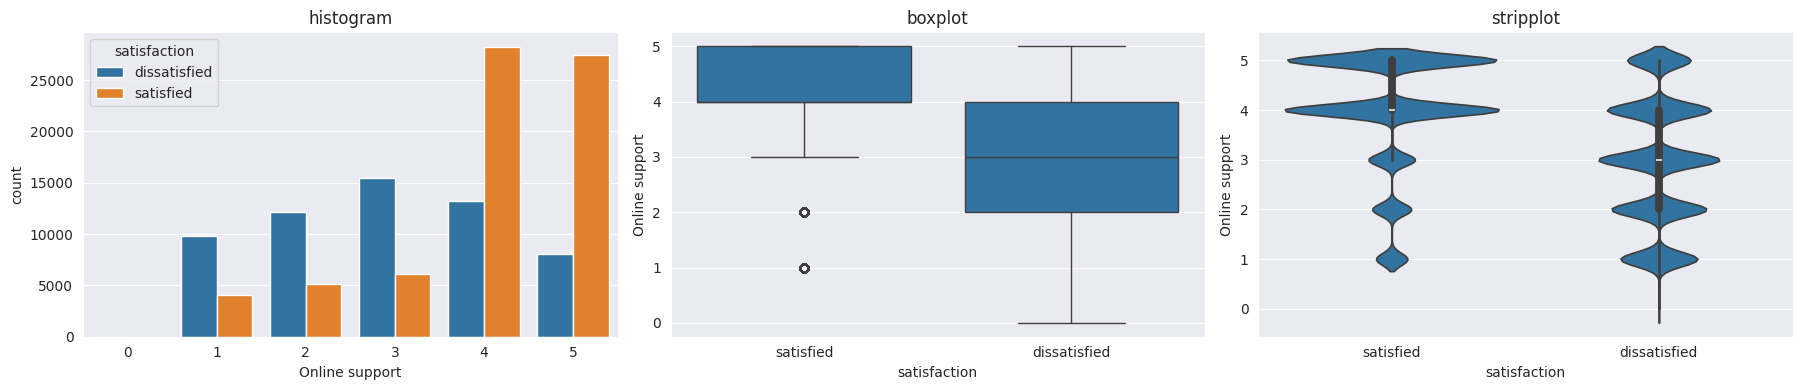

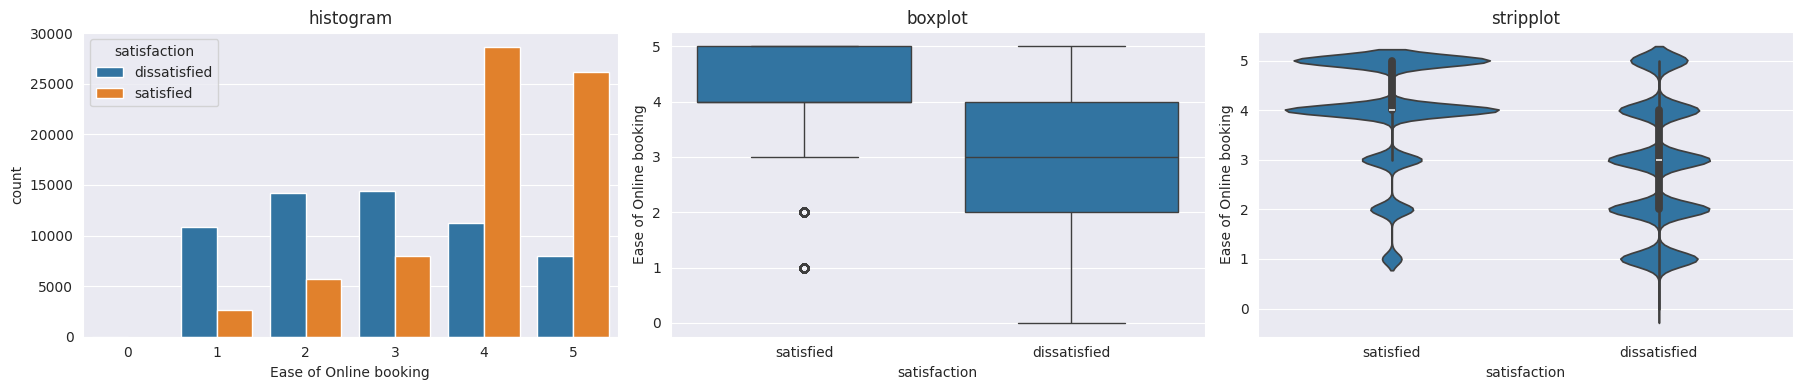

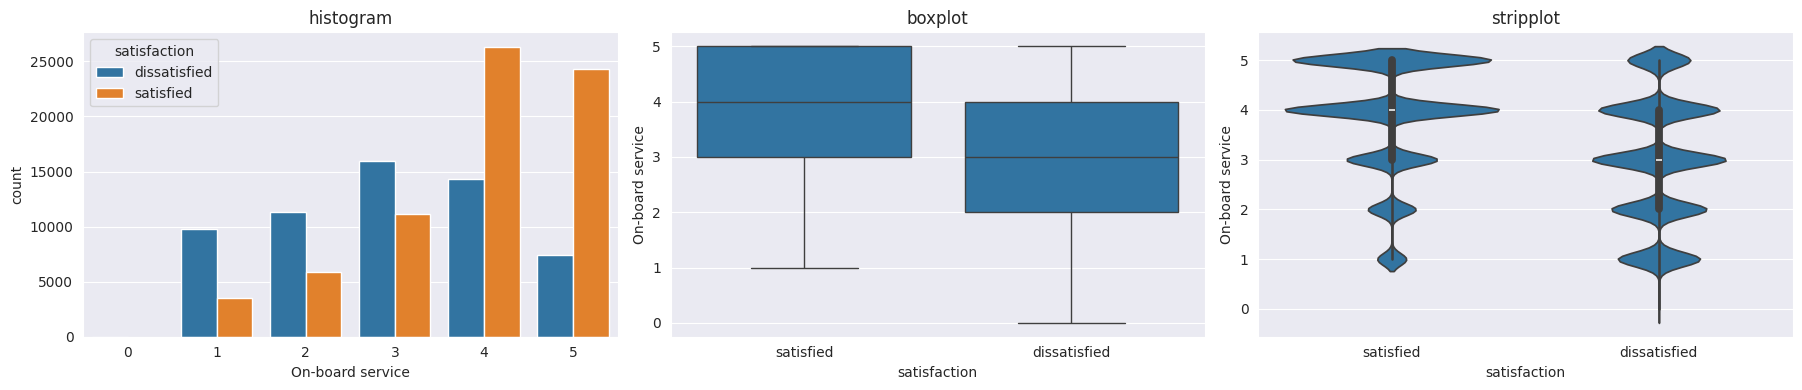

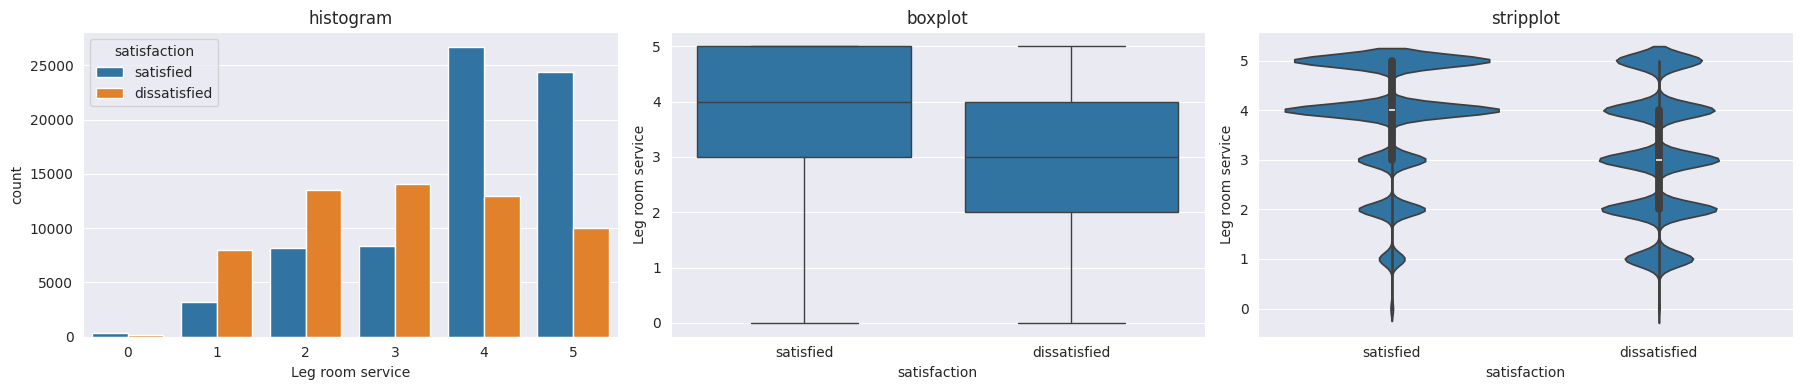

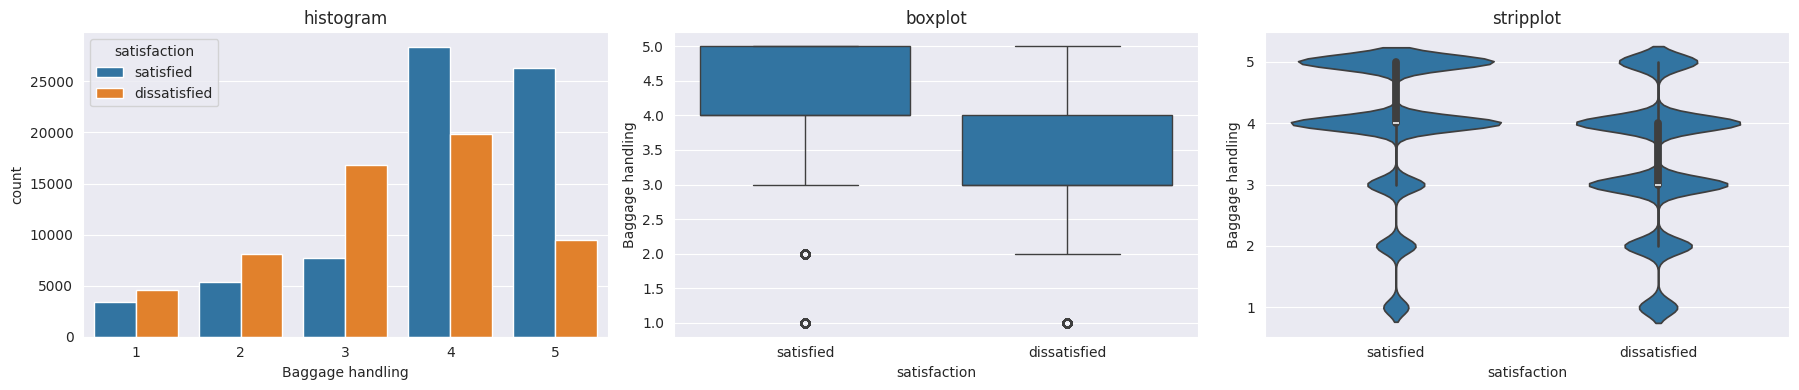

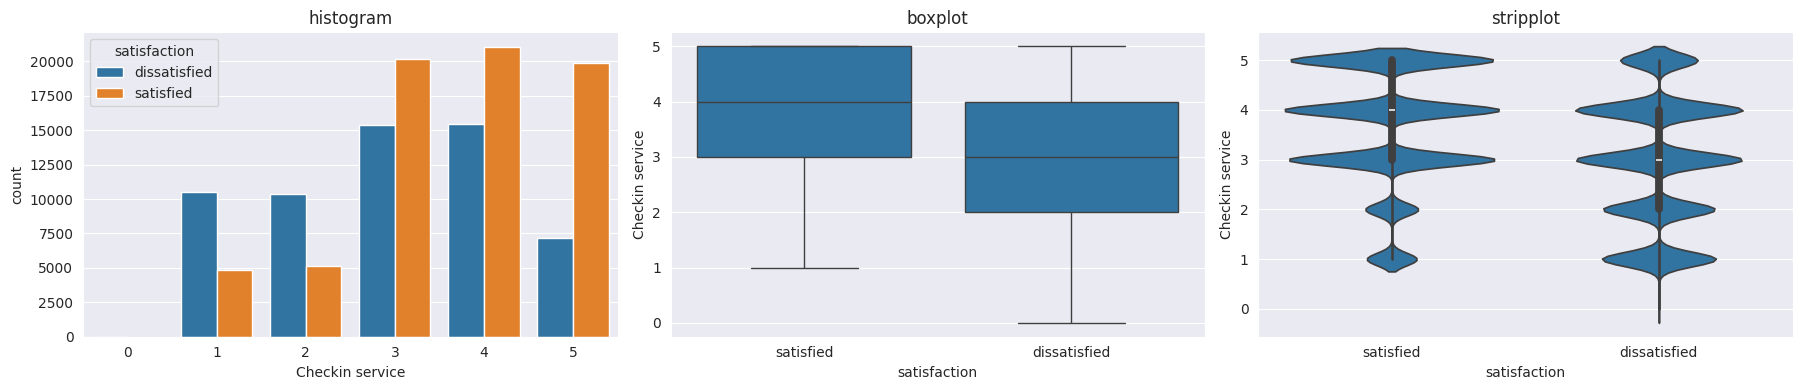

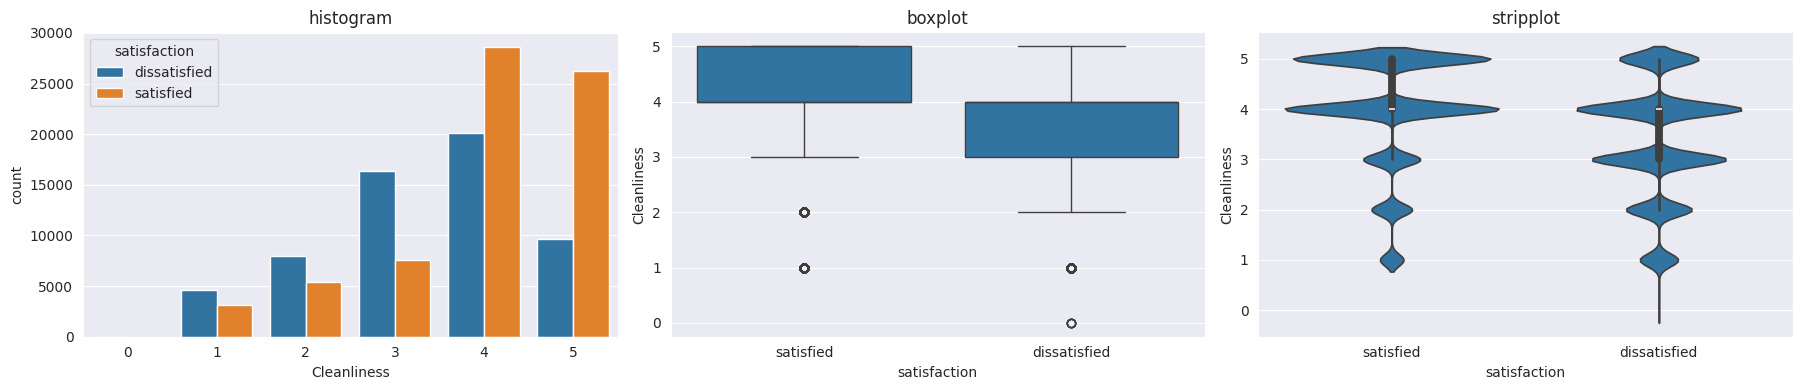

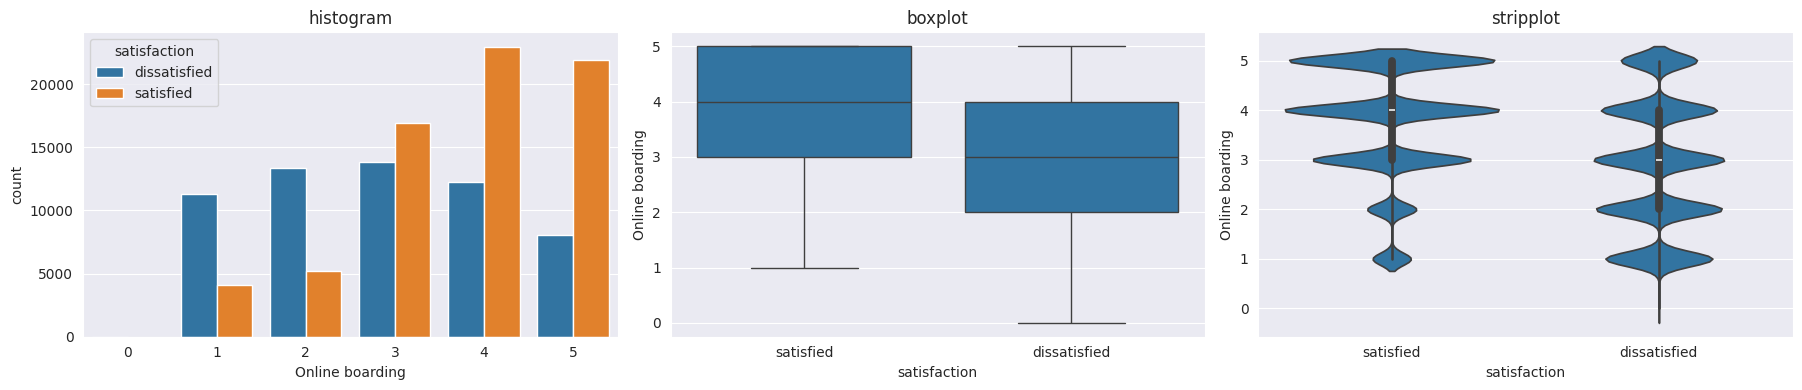

In [ ]:
for column in numerical_discrete:
     plot_numerical_discrete(column, 'satisfaction', data)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:

numerical["satisfaction"] = le.fit_transform(data["satisfaction"])
correlation= numerical.corr()

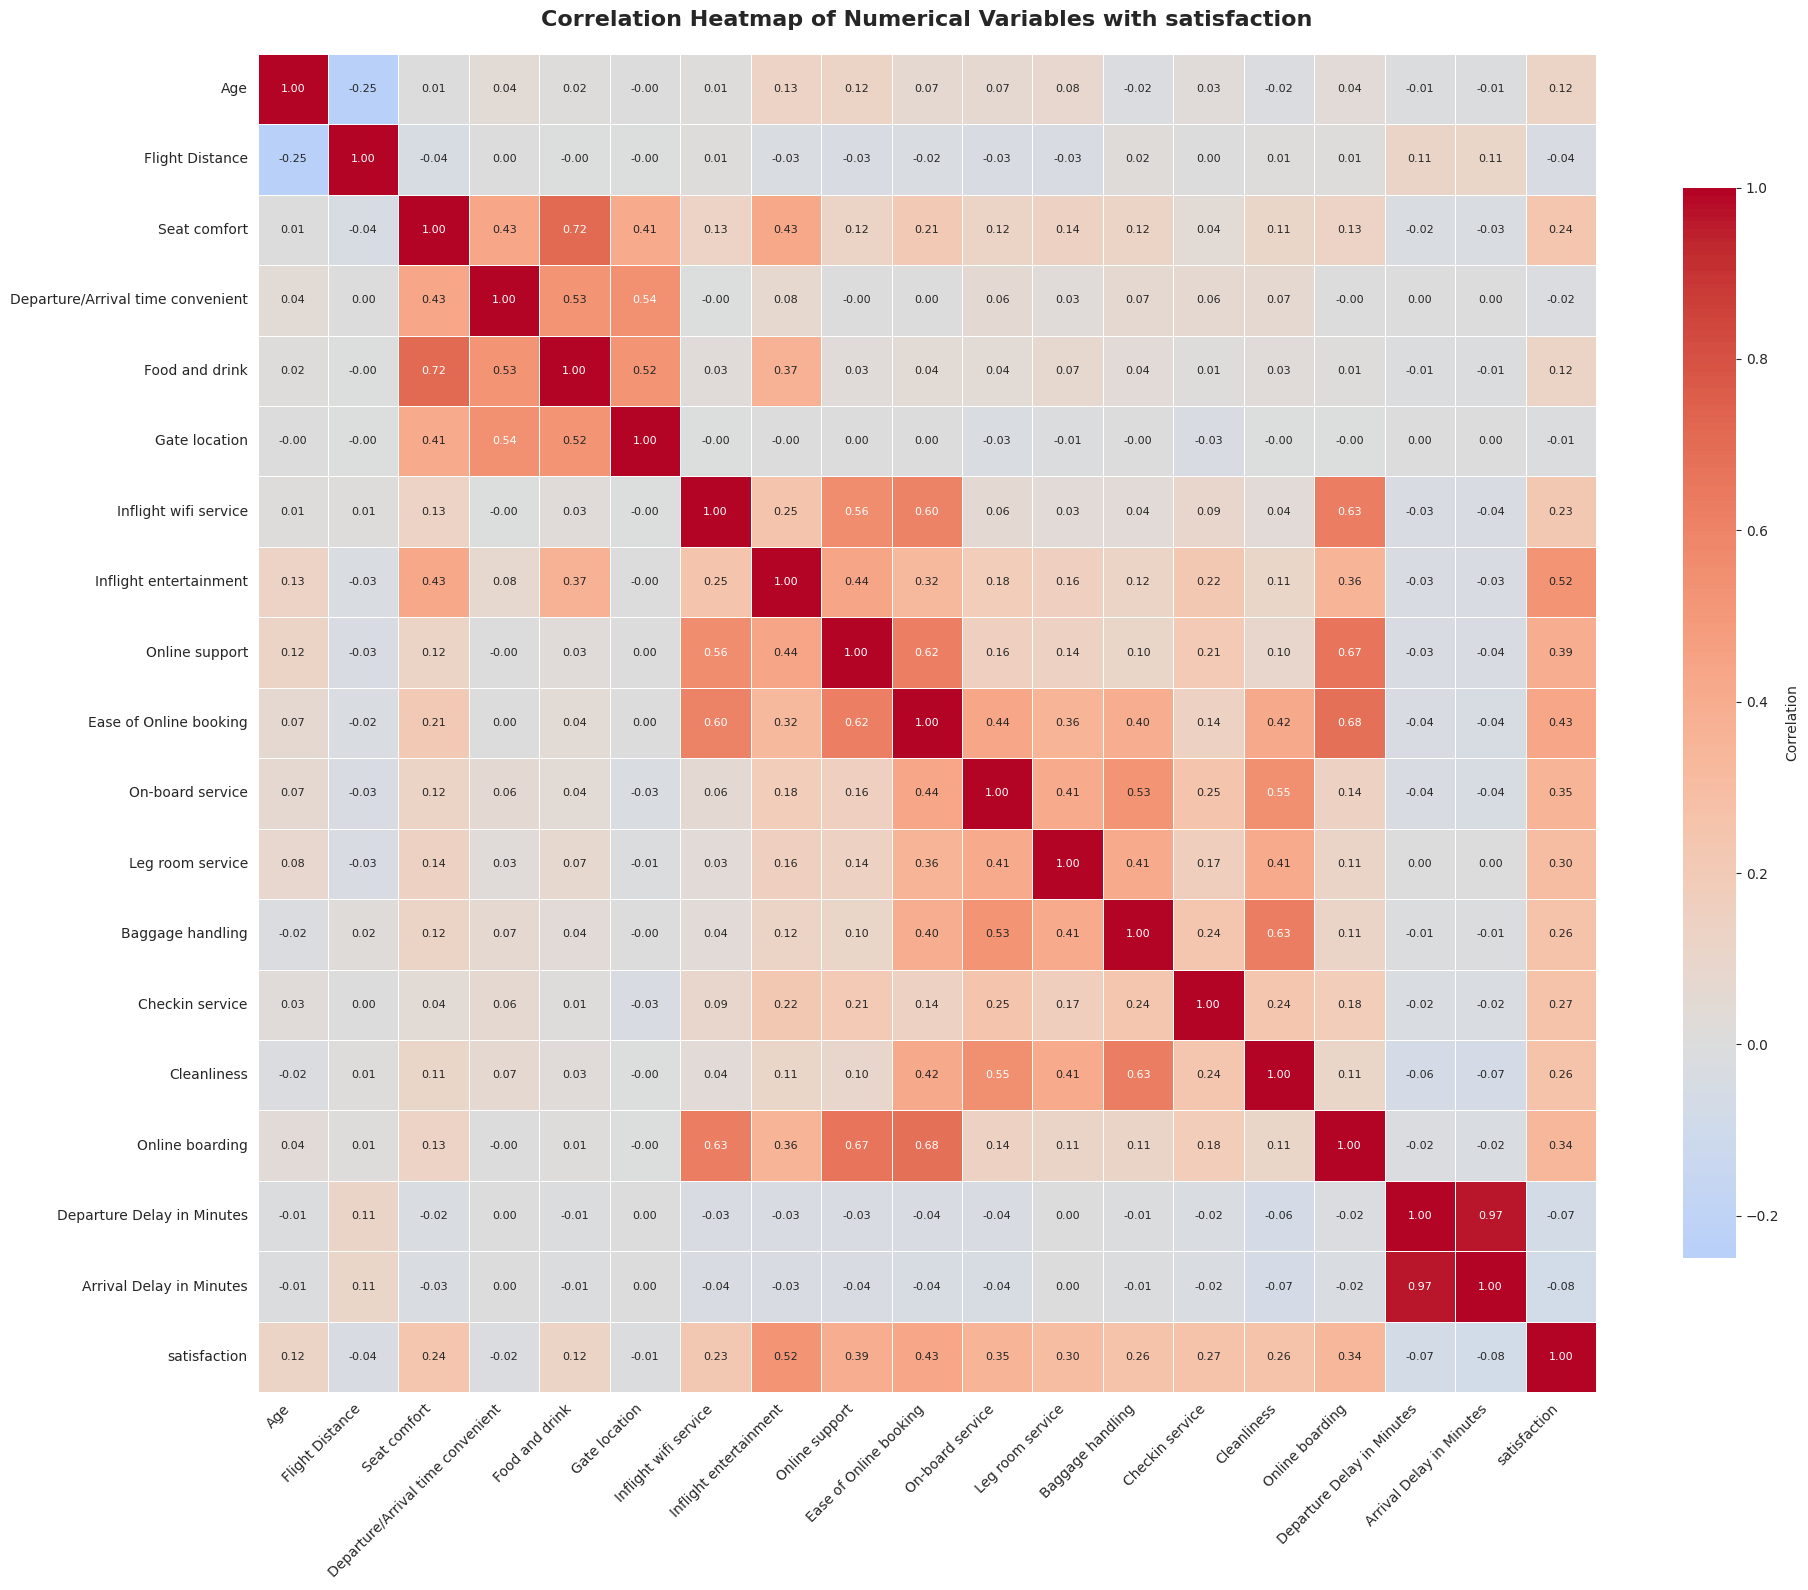

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Increase figure size for better readability
plt.figure(figsize=(20, 16))

# Create the heatmap with improved parameters
sns.heatmap(correlation,
            cmap='coolwarm',
            center=0,
            annot=True,
            fmt='.2f',
            square=True,  # Make cells square
            linewidths=0.5,  # Add grid lines
            cbar_kws={'label': 'Correlation', 'shrink': .8},  # Customize colorbar
            annot_kws={'size': 8})  # Adjust annotation text size

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Adjust title and layout
plt.title('Correlation Heatmap of Numerical Variables with satisfaction',
          pad=20,
          fontsize=16,
          fontweight='bold')

# Adjust layout to prevent cutting off labels
plt.tight_layout()

plt.show()

In [ ]:
def plot_categorical(variable, target, df):
    plt.figure(figsize=(20, 5))
    plt.subplot(1,3,1)
    # count plot
    sns.countplot(x = variable, hue = target,data = df)
    plt.title('count plot')
    plt.xticks(rotation = 90)
    plt.title('count plot ')
    # box plot
    plt.subplot(1,3,2)
    plt.xticks(rotation = 90)
    plt.title('box plot ')
    sns.boxplot(x = variable, y = target, data= df)
    #stacked plots
    plt.subplot(1,3,3)
    pd.crosstab(df[variable], df[target]).plot(kind='bar', ax = plt.gca(),stacked=True)
    plt.tight_layout()
    plt.show()

satisfaction
Gender


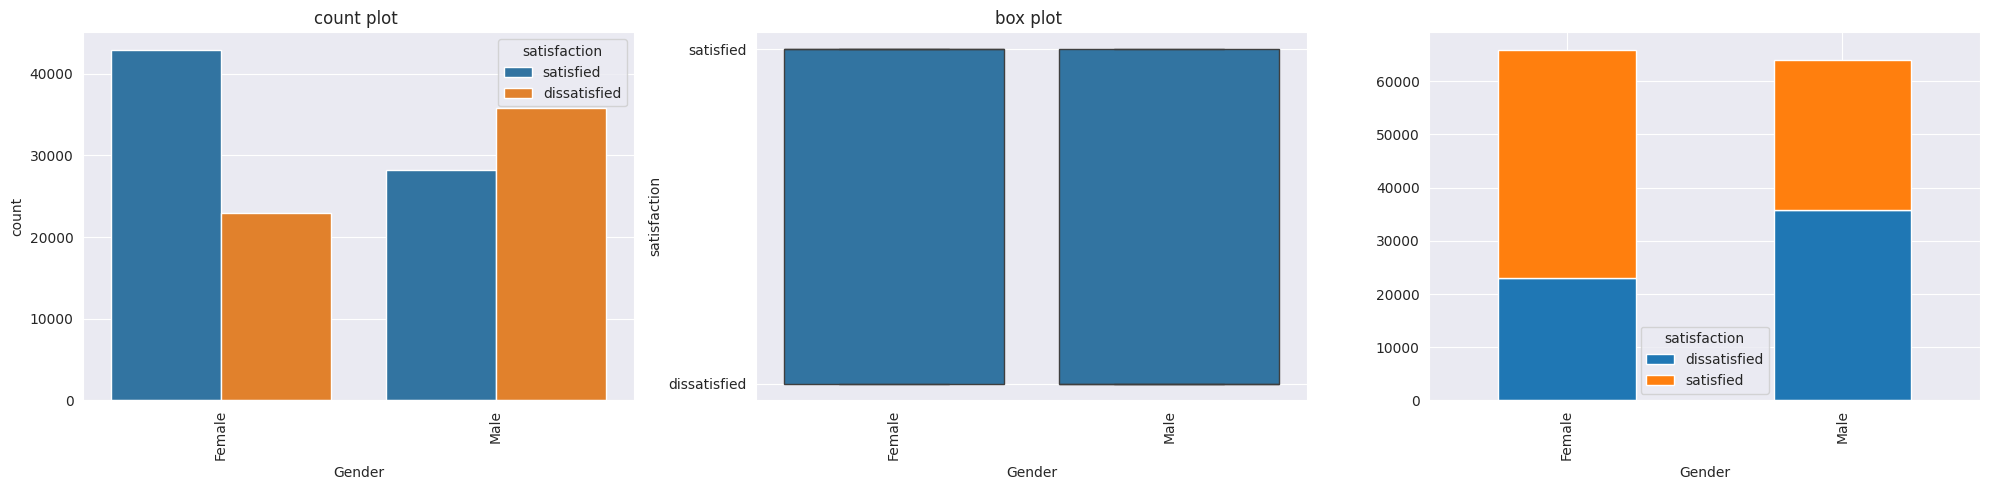

Customer Type


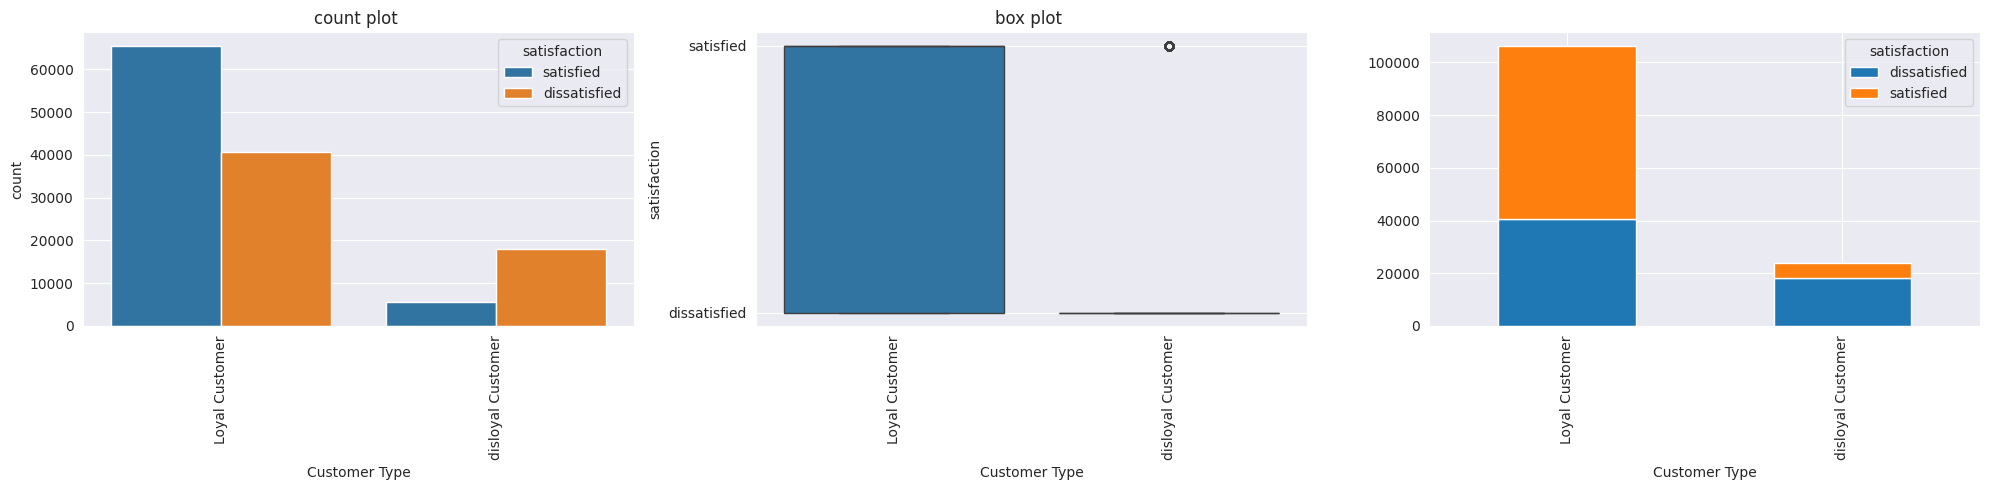

Type of Travel


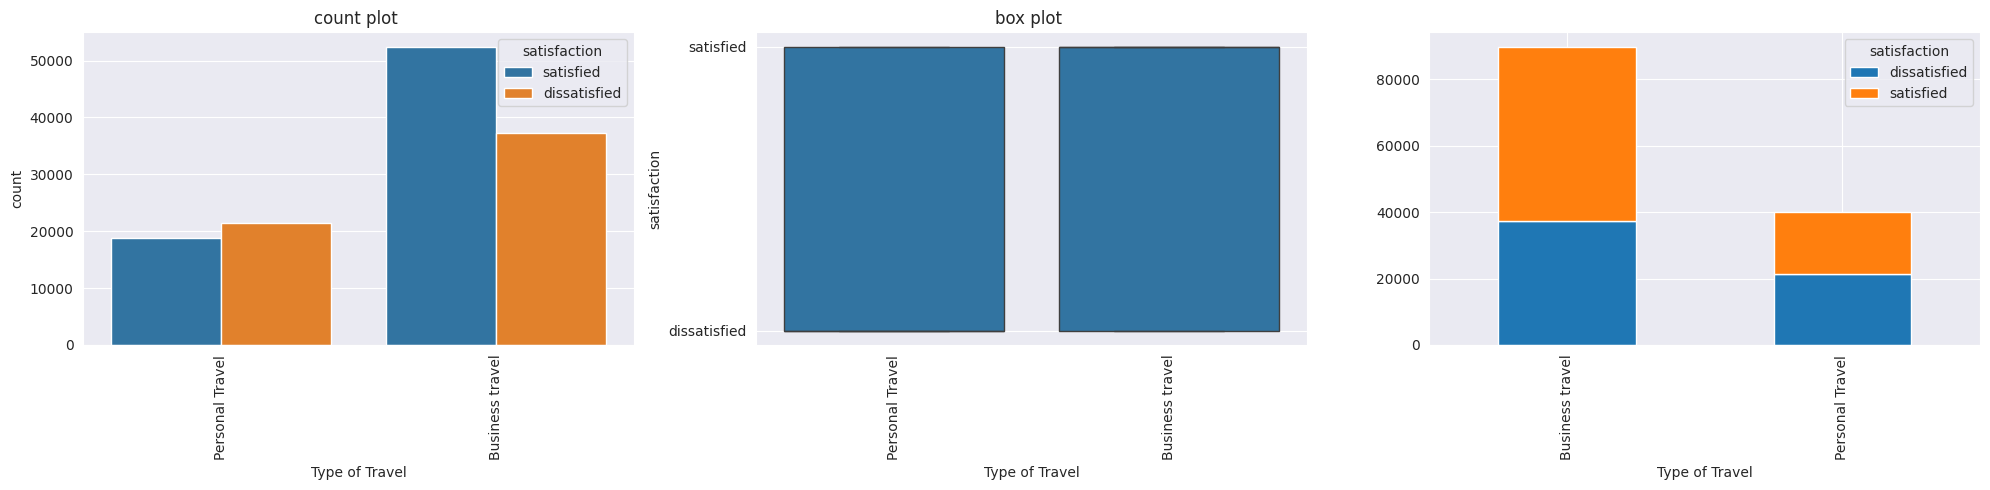

Class


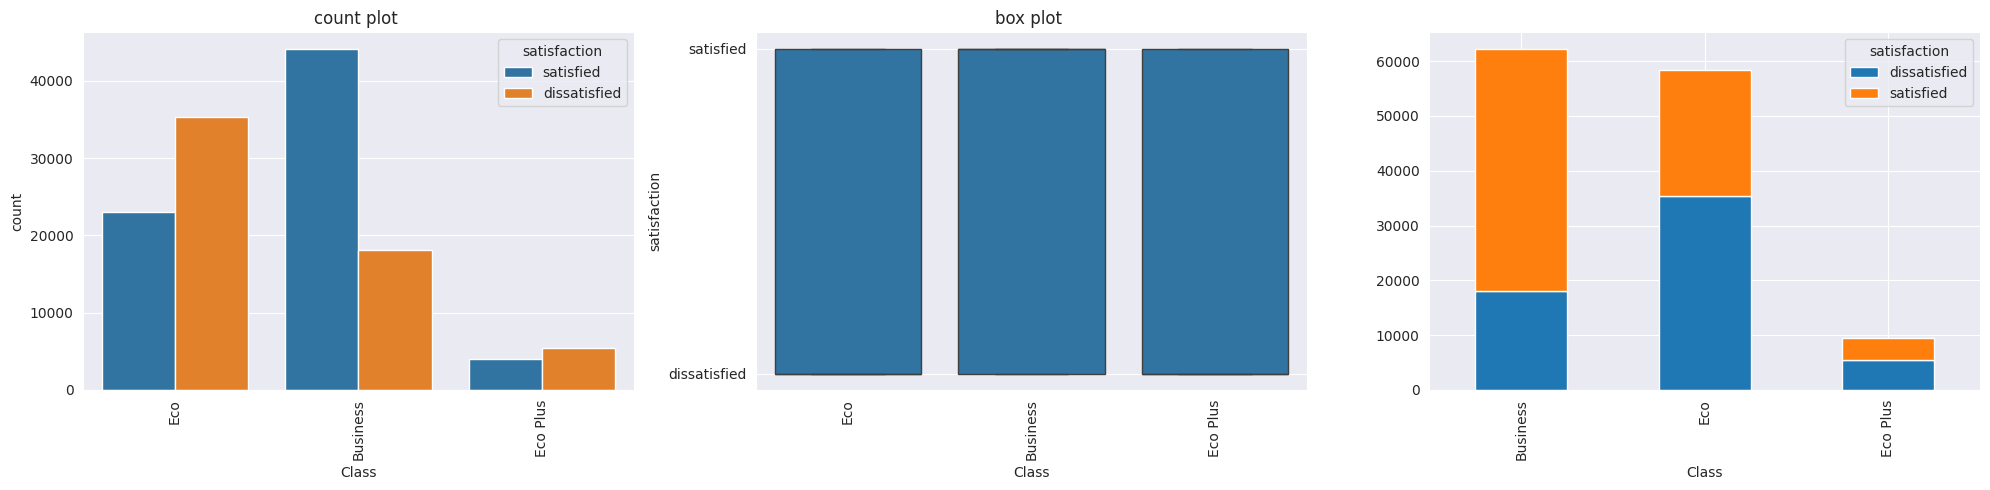

In [ ]:
for column in categorical:
    print(column)
    if column != 'satisfaction':
       plot_categorical(column,'satisfaction',data)

In [ ]:
cats = categorical.copy()

In [ ]:
encoded_df = pd.DataFrame()

for column in cats.columns:
    encoded_df[column] = le.fit_transform(cats[column])
correlation_matrix = encoded_df.corr()

In [ ]:

plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix,
            cmap='coolwarm',
            center=0,
            annot=True,
            fmt='.2f',
            square=True,  # Make cells square
            linewidths=0.5,  # Add grid lines
            cbar_kws={'label': 'Correlation', 'shrink': .8},
            annot_kws={'size': 26})


plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)


plt.title('Correlation Heatmap of categorical Variables with satisfaction',
          pad=10,
          fontsize=22,
          fontweight='bold')
plt.tight_layout()

plt.show()

# Insights from data visualization


## Airline Customer Satisfaction Analysis

### Key Insights

1. **Digital Experience is Critical**
   - Online services consistently correlate with higher satisfaction:
     * Inflight entertainment (0.52 correlation)  
     * Online booking (0.43 correlation)
     * Online support (0.39 correlation)
   - Digital touchpoints form an interconnected ecosystem of customer experience

2. **Service Fundamentals Are Interconnected**
   - Strong correlations between:
     * Seat comfort
     * Food and drink quality
     * Gate location
   - These basic comfort factors create a foundation for customer experience

3. **Surprising Delay Tolerance**
   - Despite 0.97 correlation between departure and arrival delays
   - Minimal impact on overall satisfaction (-0.07 to -0.08 correlation)
   - Suggests customers may be more forgiving of delays if other aspects are satisfactory

4. **Customer Segmentation Matters**
   - Different categories show varying satisfaction levels:
     * Customer Type has -0.29 correlation with satisfaction
     * Class and Type of Travel are strongly correlated (0.49)
   - Indicates different customer segments have distinct expectations and experiences

5. **Traditional Demographics Less Important**
   - Gender shows only moderate correlation with satisfaction (-0.21)
   - Age has minimal impact on satisfaction (0.12 correlation)
   - Suggests focusing on service quality over demographic targeting

### Recommendations

1. **Prioritize Digital Enhancement**
   - Invest in improving inflight entertainment systems
   - Upgrade online booking platforms for better user experience
   - Enhance online support capabilities
   - Create seamless integration between digital services

2. **Standardize Core Comfort**
   - Ensure consistent quality across basic comfort factors:
     * Seat comfort standards
     * Food and beverage offerings
     * Gate location and accessibility
   - Focus on these fundamentals before adding premium features

3. **Segment-Specific Strategies**
   - Develop targeted improvement plans for different customer types
   - Consider class-specific enhancements
   - Create personalized experiences based on travel type

4. **Proactive Delay Management**
   - While delays don't strongly impact satisfaction, improve communication
   - Enhance the customer experience during delays
   - Focus on making waiting times more comfortable and productive

5. **Service Integration**
   - Create cohesive service bundles that address related satisfaction factors
   - Ensure improvements in one area support related services
   - Train staff to deliver consistent service across all touchpoints

### Implementation Priority

1. High Impact, Relatively Easy:
   - Digital experience improvements
   - Communication during delays

2. High Impact, More Complex:
   - Segment-specific service enhancements
   - Core comfort standardization

3. Foundational Changes:
   - Staff training for consistent service
   - Infrastructure for integrated service delivery

# Data preprocessing

In [ ]:
data_copy = data.copy()
print(data_copy.shape)
X = data_copy.drop(["satisfaction"],axis = 1)
y = data_copy["satisfaction"]

(129880, 23)


In [ ]:
# train and val + test data
from sklearn.model_selection import train_test_split
X_train_val,X_test,y_train_val,y_test = train_test_split(X,y, test_size = 0.15, stratify= y,random_state = rs)
X_train,X_val,y_train,y_val = train_test_split(X_train_val,y_train_val,test_size = 0.1765, stratify= y_train_val,random_state= rs)

In [ ]:
print(f"""
X_train : {X_train.shape}
y_train : {y_train.shape}
X_val : {X_val.shape}
y_val : {y_val.shape}
X_test : {X_test.shape}
y_test : {y_test.shape}
""")


X_train : (90912, 22)
y_train : (90912,)
X_val : (19486, 22)
y_val : (19486,)
X_test : (19482, 22)
y_test : (19482,)



In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
categorical_trans = Pipeline(steps =
[("encode",OneHotEncoder(handle_unknown = "ignore")),
("impute", SimpleImputer(strategy = "most_frequent"))
]
)
categorical_trans

Pipeline(steps=[('encode', OneHotEncoder(handle_unknown='ignore')),
                ('impute', SimpleImputer(strategy='most_frequent'))])

In [ ]:
numerical_trans = Pipeline(steps =
[("scaler", StandardScaler()),
("impute", SimpleImputer(strategy = "mean"))
])
numerical_trans

Pipeline(steps=[('scaler', StandardScaler()), ('impute', SimpleImputer())])

In [ ]:
transformer= ColumnTransformer(transformers =
[("Numerical", numerical_trans, numerical_columns),
("categorical", categorical_trans, categorical_columns)
])
transformer

ColumnTransformer(transformers=[('Numerical',
                                 Pipeline(steps=[('scaler', StandardScaler()),
                                                 ('impute', SimpleImputer())]),
                                 Index(['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment',
       'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')),
                                ('categorical',
                                 Pipeline(steps=[('encode',
                                                  OneHotEncoder(handle_unknown='ignore')),
                                                 ('impute',
                                                  SimpleImputer(strategy='most_frequent'))]),
                                 ['Gender', 'Customer Type', 'Type of Travel',
                                  'Class'])])

In [ ]:
pipeline= Pipeline(steps=
[("preprocess", transformer),
#("model", LogisticRegression())
])
pipeline

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('Numerical',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler()),
                                                                  ('impute',
                                                                   SimpleImputer())]),
                                                  Index(['Age', 'Flight Distance', 'Seat comfort', 'Departure/Arrival time convenient',
       'Food and drink', 'Gate location', 'Inflight wifi service', 'Inflight entertainment',
       'Online support', 'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder(handle_unknown='ignore')),
                                                                  ('impute',
                                                                   SimpleImputer(strategy='most_frequent'))]),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel',
                                                   'Class'])]))])

In [ ]:
X_train_new = pipeline.fit_transform(X_train,y_train)
X_test_new = pipeline.transform(X_test)
X_val_new = pipeline.transform(X_val)

# Model Building

- LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
lr = LogisticRegression(C = 0.45 )

In [ ]:
lr.fit(X_train_new,y_train)

LogisticRegression(C=0.45)

In [ ]:
y_pred = lr.predict(X_val_new)
print(classification_report(y_val,y_pred))

              precision    recall  f1-score   support

dissatisfied       0.82      0.82      0.82      8821
   satisfied       0.85      0.85      0.85     10665

    accuracy                           0.84     19486
   macro avg       0.84      0.84      0.84     19486
weighted avg       0.84      0.84      0.84     19486



- SVM

In [ ]:
from sklearn.svm import SVC,LinearSVC

In [ ]:
svc = SVC(kernel = 'rbf', C = 0.3, probability = True)

In [ ]:
svc.fit(X_train_new,y_train)

In [ ]:
y_svc = svc.predict(X_val_new)
print(classification_report(y_val,y_svc))

- KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
knn.fit(X_train_new,y_train)

In [ ]:
y_knn = knn.predict(X_val_new)
print(classification_report(y_val,y_knn))

- SGD CLASSIFIER

In [ ]:
from sklearn.linear_model import SGDClassifier

In [ ]:
sgd = SGDClassifier(loss = "log_loss", alpha = 0.001)

In [ ]:
sgd.fit(X_train_new,y_train)

In [ ]:
y_sgd = sgd.predict(X_val_new)
print(classification_report(y_val,y_sgd))

- DECISION TREES

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dtc = DecisionTreeClassifier(criterion= "entropy",max_depth = 17)
dtc

In [ ]:
dtc.fit(X_train_new,y_train)

In [ ]:
y_dtc = dtc.predict(X_val_new)
print(classification_report(y_val,y_dtc))

- RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators = 150,max_depth = 15)
rfc

In [ ]:
rfc.fit(X_train_new,y_train)

In [ ]:
y_rfc = rfc.predict(X_val_new)
print(classification_report(y_val,y_rfc))

In [ ]:
importances = rfc.feature_importances_
#print(len(importances))
feature_names = pipeline.named_steps['preprocess'].get_feature_names_out()
importance_df = pd.DataFrame(
{
    'feature' : feature_names,
    'importance' : (importances * 100)
}
)

# Round the 'importance' values to 2 decimal places
importance_df['importance'] = importance_df['importance'].round(2)

# Sort the dataframe by 'importance' in descending order
sorted_importance_df = importance_df.sort_values(by="importance", ascending=False)

# Print the sorted dataframe
print(sorted_importance_df)

- VOTING CLASSIFIER

In [ ]:
from sklearn.ensemble import VotingClassifier

In [ ]:
estimators= [("lr",lr),("SGD",sgd),("svc",svc),("knn",knn),("svm",svc),("DTC",dtc),("rfc",rfc)]

In [ ]:
vtc = VotingClassifier(n_jobs = -1,estimators=estimators)
vtc

In [ ]:
vtc.fit(X_train_new,y_train)

In [ ]:
y_vtc = vtc.predict(X_val_new)
print(classification_report(y_val,y_vtc))

- GRID SEARCH

In [ ]:
models = {
"lr":lr,
"sgd":sgd,
"svc":svc,
"knn":knn,
"dtc":dtc,
"rfc":rfc
}

In [ ]:
param_grids = {
    "lr": [
        {
            "penalty": ["l1", "l2"],
            "max_iter": [100, 500, 1000],
            "C": [0.01, 0.1, 1, 10, 100],
            "solver": ["liblinear"]
        },
        {
            "penalty": ["l2", None],
            "max_iter": [100, 500, 1000],
            "C": [0.01, 0.1, 1, 10, 100],
            "solver": ["lbfgs", "sag"]
        },
        {
            "penalty": ["l1", "l2", "elasticnet"],
            "C": [0.01, 0.1, 1, 10, 100],
            "max_iter": [100, 500, 1000],
            "solver": ["saga"],
            "l1_ratio": [0.1,0.3,0.5,0.7,1]
        }
    ],
    "sgd": {
        "loss": ["log_loss", "hinge", "perceptron"],
        "alpha": [0.01, 0.1, 1, 10, 100],
        "max_iter": [100, 500, 1000]
    },
    "svc": [
        {
            "C": [0.001, 0.1, 0.01, 1, 100],
            "kernel": ["rbf", "sigmoid", "poly", "linear"],
            "degree": [2, 3, 5, 7, 10]
        },
        {
            "C": [0.001, 0.1, 0.01, 1, 100],
            "kernel": ["poly"],
            "degree": [2, 3, 5, 7, 10]
        }
    ],
    "knn": {
        "n_neighbors": [3, 5, 10, 15, 20],
        "metric": ["euclidean", "manhattan"]
    },
    "dtc": {
        "criterion": ["gini", "entropy"],
        "max_depth": [2, 5, 10, 20],
        "min_samples_leaf": [2, 5, 10, 15]
    },
    "rfc": {
        "n_estimators": [50, 100, 300, 500],
        "criterion": ["gini", "entropy"],
        "max_depth": [2, 5, 10, 20],
        "min_samples_leaf": [2, 5, 10, 15]
    }
}

- Grid search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

In [ ]:
best_params = {}

In [ ]:
for name,model in models.items():
    random_search = RandomizedSearchCV(estimator = model,
param_distributions = param_grids[name],
cv = 5, n_iter = 10, random_state = rs, n_jobs = -1)
    random_search.fit(X_train_new,y_train)
    best_params = {
    name: random_search.best_params_
}
    print(f"best parameter for {name} : {random_search.best_params_}")
    print(f"best score for {name} : {random_search.best_score_}")